In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("df.pkl")

In [3]:
df.columns

Index(['day', 'year', 'month', 'carrier', 'carrier_name', 'airport',
       'airport_name', 'arrival_flights', 'arrival_del15', 'carrier_count',
       'weather_count', 'nas_count', 'security_count', 'late_aircraft_count',
       'arrival_cancelled', 'arrival_diverted', 'arrival_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'date', 'week_day', 'quarter', 'quarter_w_cut',
       'county_state', 'county', 'state', 'state_name'],
      dtype='object')

Information about the data

- year:                Year data collected
- month:               Numeric representation of the month
- carrier:             Carrier.
- carrier_name:        Carrier Name.
- airport:             Airport code.
- airport_name:        Name of airport.
- arrival_flights:         Number of flights arriving at airport
- arrival_del15:           Number of flights more than 15 minutes late
- carrier_count:          Number of flights delayed due to air carrier. (e.g. no crew)
- weather_count:          Number of flights due to weather.
- nas_count:              Number of flights delayed due to National Aviation System (e.g. heavy air traffic).
- security_count:         Number of flights canceled due to a security breach.
- late_aircraft_count:    Number of flights delayed as a result of another flight on the same aircraft delayed
- arrival_cancelled:       Number of cancelled flights
- arrival_diverted:        Number of flights that were diverted
- arrival_delay:           Total time (minutes) of delayed flight.
- carrier_delay:       Total time (minutes) of delay due to air carrier
- weather_delay:       Total time (minutes) of delay due to inclement weather.
- nas_delay:           Total time (minutes) of delay due to National Aviation System.
- security_delay:      Total time (minutes) of delay as a result of a security issue .
- late_aircraft_delay: Total time (minutes) of delay flights as a result of a previous flight on the same airplane being late.


### Hands On 

**Provide a "misery index" for airports. That is, sort the airports in descending order of the probability that a flight ~~departing from~~ arriving to that airport has a delay. Take care of outliers: some airports may have a preposterously low number of flights**

In [4]:
df_airport_delay         = df[['airport','arrival_flights','arrival_delay']]
df_airport_delay_grouped = df_airport_delay.groupby(['airport'])
df_total_airport_delay   = df_airport_delay_grouped.agg(
     total_flights = ('arrival_flights','sum'),
     total_delay = ('arrival_delay','sum'),
     ).reset_index()
df_total_airport_delay.head()

,airport,total_flights,total_delay
0,ABE,7559,91936
1,ABI,4011,38606
2,ABQ,30591,390251
3,ABR,1236,11609
4,ABY,1689,11142


In [5]:
low_limit                       = df_total_airport_delay.describe()['total_flights']["25%"]
df_total_airport_delay_filtered = df_total_airport_delay[(df_total_airport_delay["total_flights"]>low_limit)].reset_index(drop = True)
df_total_airport_delay_filtered['average_delay'] = df_total_airport_delay_filtered["total_flights"]/df_total_airport_delay_filtered["total_delay"]
df_total_airport_delay_filtered = df_total_airport_delay_filtered.sort_values(by=["average_delay"],ascending=False).reset_index(drop = True)
df_total_airport_delay_filtered.reset_index(inplace=True)
df_total_airport_delay_filtered = df_total_airport_delay_filtered.rename(columns = {'index':'misery_index'})
df_total_airport_delay_filtered_final = df_total_airport_delay_filtered[['misery_index','airport']]
df_total_airport_delay_filtered_final = df_total_airport_delay_filtered_final.assign(misery_index = df_total_airport_delay_filtered_final['misery_index']+1)
df_total_airport_delay_filtered_final.head(10)

,misery_index,airport
0,1,PUW
1,2,ALW
2,3,EAT
3,4,ITO
4,5,LWS
5,6,ACT
6,7,SUN
7,8,SPS
8,9,ADQ
9,10,GTR


**This time the criterion will be the average and median delay you may expect to have with an ~~airline~~ airport. Again we do ~~not~~ care about outliers.**

In [6]:
df_airport_delay         = df[['airport','arrival_flights','arrival_delay']]
df_airport_delay_grouped = df_airport_delay.groupby(['airport'])
df_total_airport_delay   = df_airport_delay_grouped.agg(
     total_flights = ('arrival_flights','sum'),
     median_delay = ('arrival_delay','median'),
     mean_delay = ('arrival_delay','mean'),  
     ).reset_index()
df_total_airport_delay.head()

,airport,total_flights,median_delay,mean_delay
0,ABE,7559,572.5,1044.727273
1,ABI,4011,1071.0,1286.866667
2,ABQ,30591,428.0,1667.739316
3,ABR,1236,407.0,580.450000
4,ABY,1689,467.0,557.100000


In [7]:
low_limit                       = df_total_airport_delay.describe()['total_flights']["25%"]
df_total_airport_delay_filtered = df_total_airport_delay[(df_total_airport_delay["total_flights"]>low_limit)].reset_index(drop = True)

In [8]:
df_total_airport_delay_filtered = df_total_airport_delay_filtered.sort_values(by=["median_delay"],ascending=False).reset_index(drop = True)
df_total_airport_delay_filtered = df_total_airport_delay_filtered.assign(median_index = df_total_airport_delay_filtered.index.values+1)
df_total_airport_delay_filtered = df_total_airport_delay_filtered.sort_values(by=["mean_delay"],ascending=False).reset_index(drop = True)
df_total_airport_delay_filtered = df_total_airport_delay_filtered.assign(mean_index = df_total_airport_delay_filtered.index+1)
df_total_airport_delay_filtered['misery_index'] = df_total_airport_delay_filtered[['median_index', 'mean_index']].mean(axis=1)
df_total_airport_delay_filtered_final = df_total_airport_delay_filtered[['misery_index','airport']].sort_values(by=["misery_index"],ascending=True).reset_index(drop=True)
df_total_airport_delay_filtered_final.head(10)

,misery_index,airport
0,3.0,MCO
1,3.0,SFB
2,4.5,ORD
3,6.5,DEN
4,6.5,PIE
5,7.0,DFW
6,7.5,PGD
7,7.5,JFK
8,8.5,LAX
9,12.0,ASE


**Provide a "misery index" for airlines. That is, do the same thing you did for the airports, but this time we are interested in the airlines that make life difficult for passengers. Sort the airlines in descending order of probability that a flight operated by the airline has a delay. This time we do not care about outliers.**

In [9]:
df_airline_delay         = df[['carrier_name','arrival_flights','carrier_delay']]
df_airline_delay_grouped = df_airline_delay.groupby(['carrier_name'])
df_total_airline_delay   = df_airline_delay_grouped.agg(
     total_flights = ('arrival_flights','sum'),
     total_carrier_delay = ('carrier_delay','sum'),
     ).reset_index()

df_total_airline_delay['average_carrier_delay'] = df_total_airline_delay["total_flights"]/df_total_airline_delay["total_carrier_delay"]
df_total_airline_delay = df_total_airline_delay.sort_values(by=["average_carrier_delay"],ascending=False).reset_index(drop=True).assign(misery_index = df_total_airline_delay.index+1)
df_total_airline_delay_final = df_total_airline_delay[['misery_index','carrier_name']]
df_total_airline_delay_final.head()

,misery_index,carrier_name
0,1,Envoy Air
1,2,Horizon Air
2,3,Alaska Airlines Inc.
3,4,Endeavor Air Inc.
4,5,Hawaiian Airlines Inc.


**We are interested in the temporal distribution of delays, so create a plot that shows the number of flights and the number of delayed flights per month of year.**

In [10]:
df_distribution = df[['date','arrival_flights','arrival_del15']]
dict = {'date Name': 'date',
        'arrival_flights': 'total_flights',
        'arrival_del15': 'delayed_flights'}
df_distribution = df_distribution.rename(columns=dict)

df_distribution_grouped = df_distribution.groupby(['date'])
df_distribution_total   = df_distribution_grouped.agg(
     total_flights = ('total_flights','sum'),
     delayed_flights = ('delayed_flights','sum'),
     ).reset_index().sort_values(by=['date'])
df_distribution_total['date'] = pd.to_datetime(df_distribution_total['date'], format="%Y-%m-%d")
# df_distribution_total.set_index('date',inplace=True)
# df_distribution_total.index = pd.to_datetime(df_distribution_total.index, format="%Y-%m-%d")
df_distribution_total

,date,total_flights,delayed_flights
0,2021-01-01,361740,35019.517691
1,2021-02-01,332780,45710.035382
2,2021-03-01,445412,44818.553073
3,2021-04-01,450949,47740.517691
4,2021-05-01,495544,65606.000000
5,2021-06-01,546124,127565.000000
6,2021-07-01,584818,143415.588455
7,2021-08-01,580739,127679.588455
8,2021-09-01,538363,73480.035382
9,2021-10-01,565724,99820.070764


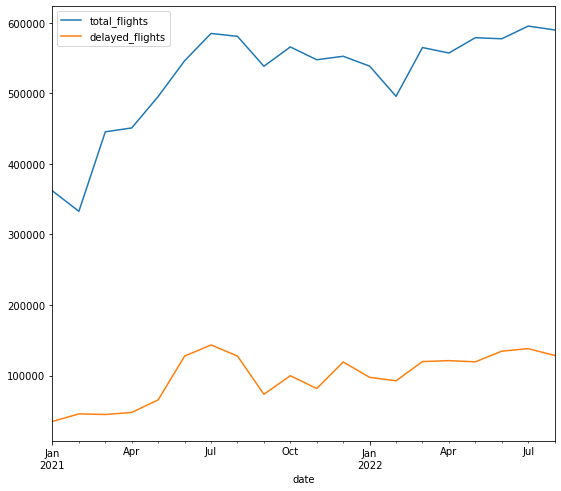

In [11]:
df_distribution_total.plot(x='date',y=["total_flights", "delayed_flights"], kind='line', figsize=(9, 8))
plt.show()

**Provide a table that shows, for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. With this table at hand, show how you can determine the best airline for a particular pair of origin and destination airports.**

## NOT APPLICABLE HERE